In [1]:
# Importieren der benötigten Bibliotheken
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = "data/tess_exoplanet_dataset.csv"

if not os.path.exists(file_path):
    url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+TOI&format=csv"
    df = pd.read_csv(url) 
    df.to_csv(file_path, index=False)
else:
    df = pd.read_csv(file_path)

## Bereinigung

In [3]:
# Übersicht über die Variablen
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7358 entries, 0 to 7357
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7358 non-null   int64  
 1   toi                7358 non-null   float64
 2   toidisplay         7358 non-null   object 
 3   toipfx             7358 non-null   int64  
 4   ctoi_alias         7358 non-null   float64
 5   pl_pnum            7358 non-null   int64  
 6   tfopwg_disp        7356 non-null   object 
 7   st_tmag            7358 non-null   float64
 8   st_tmagerr1        7358 non-null   float64
 9   st_tmagerr2        7358 non-null   float64
 10  st_tmagsymerr      7358 non-null   int64  
 11  st_tmaglim         7358 non-null   int64  
 12  rastr              7358 non-null   object 
 13  ra                 7358 non-null   float64
 14  raerr1             0 non-null      float64
 15  raerr2             0 non-null      float64
 16  rasymerr           0 non

In [4]:
# Identifikation fehlender Werte
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Spalten mit mind. einem NULL-Wert: {missing_values.count()}")
print(f"Anteil aller Spalten: {missing_values.count() / df.shape[1] * 100:.2f} %")
print(f"Durschnittliche Anzahl an NULL-Werten: {missing_values.mean():.1f}")
print(f"Median Anzahl an NULL-Werten: {missing_values.median()}")

Spalten mit mind. einem NULL-Wert: 52
Anteil aller Spalten: 57.14 %
Durschnittliche Anzahl an NULL-Werten: 2459.4
Median Anzahl an NULL-Werten: 464.5


In [5]:
# Spalten mit einer zu hohen Anzahl an fehlenden Werten (> 15 %)
missing_values = missing_values[missing_values > 0.15 * len(df)]
print(f"Spalten mit > 15 % NULL-Werten: {missing_values.count()}")
print(f"Durchschnittliche Anzahl an NULL-Werten: {missing_values.mean():.1f}")
print(f"Median der Anzahl an NULL-Werten: {missing_values.median()}")

Spalten mit > 15 % NULL-Werten: 21
Durchschnittliche Anzahl an NULL-Werten: 5781.3
Median der Anzahl an NULL-Werten: 7358.0


In [6]:
# Entfernen der Spalten mit einer zu hohen Anzahl an fehlenden Werten
print(f"Anzahl Spalten vor entfernen: {df.shape[1]}")
df = df.drop(columns=missing_values.index)
print(f"Anzahl Spalten nach entfernen: {df.shape[1]}")


Anzahl Spalten vor entfernen: 91
Anzahl Spalten nach entfernen: 70


In [7]:
# Entfernen von Zeilen mit fehlenden Werten in kritischen Variablen
key_columns = ['pl_orbper', 'pl_trandep', 'pl_rade']
df_cleaned = df.dropna(subset=key_columns)

In [8]:
# Überprüfen des Datensatzes nach Bereinigung
print(f"Anzahl der verbleibenden Zeilen nach Entfernung fehlender Werte: {len(df_cleaned)}")
print(f"Entfernte Zeilen: {len(df) - len(df_cleaned)}")
df = df_cleaned

Anzahl der verbleibenden Zeilen nach Entfernung fehlender Werte: 6772
Entfernte Zeilen: 586


In [9]:
# Berechnung von deskriptiven Statistiken für die wichtigsten Variablen
descriptive_stats = df_cleaned[key_columns].describe()

print("Deskriptive Statistiken für Period, Depth und Planet Radius:")
print(descriptive_stats)


Deskriptive Statistiken für Period, Depth und Planet Radius:
         pl_orbper     pl_trandep      pl_rade
count  6772.000000    6772.000000  6772.000000
mean     18.934476    7809.634860    10.374171
std     101.860813   11918.079166     8.692313
min       0.184692      24.583493     0.552507
25%       2.504407    1301.000000     4.477320
50%       4.160069    4571.500000    10.571100
75%       8.196941   10134.017142    14.089150
max    1837.889731  225793.106096   297.111726


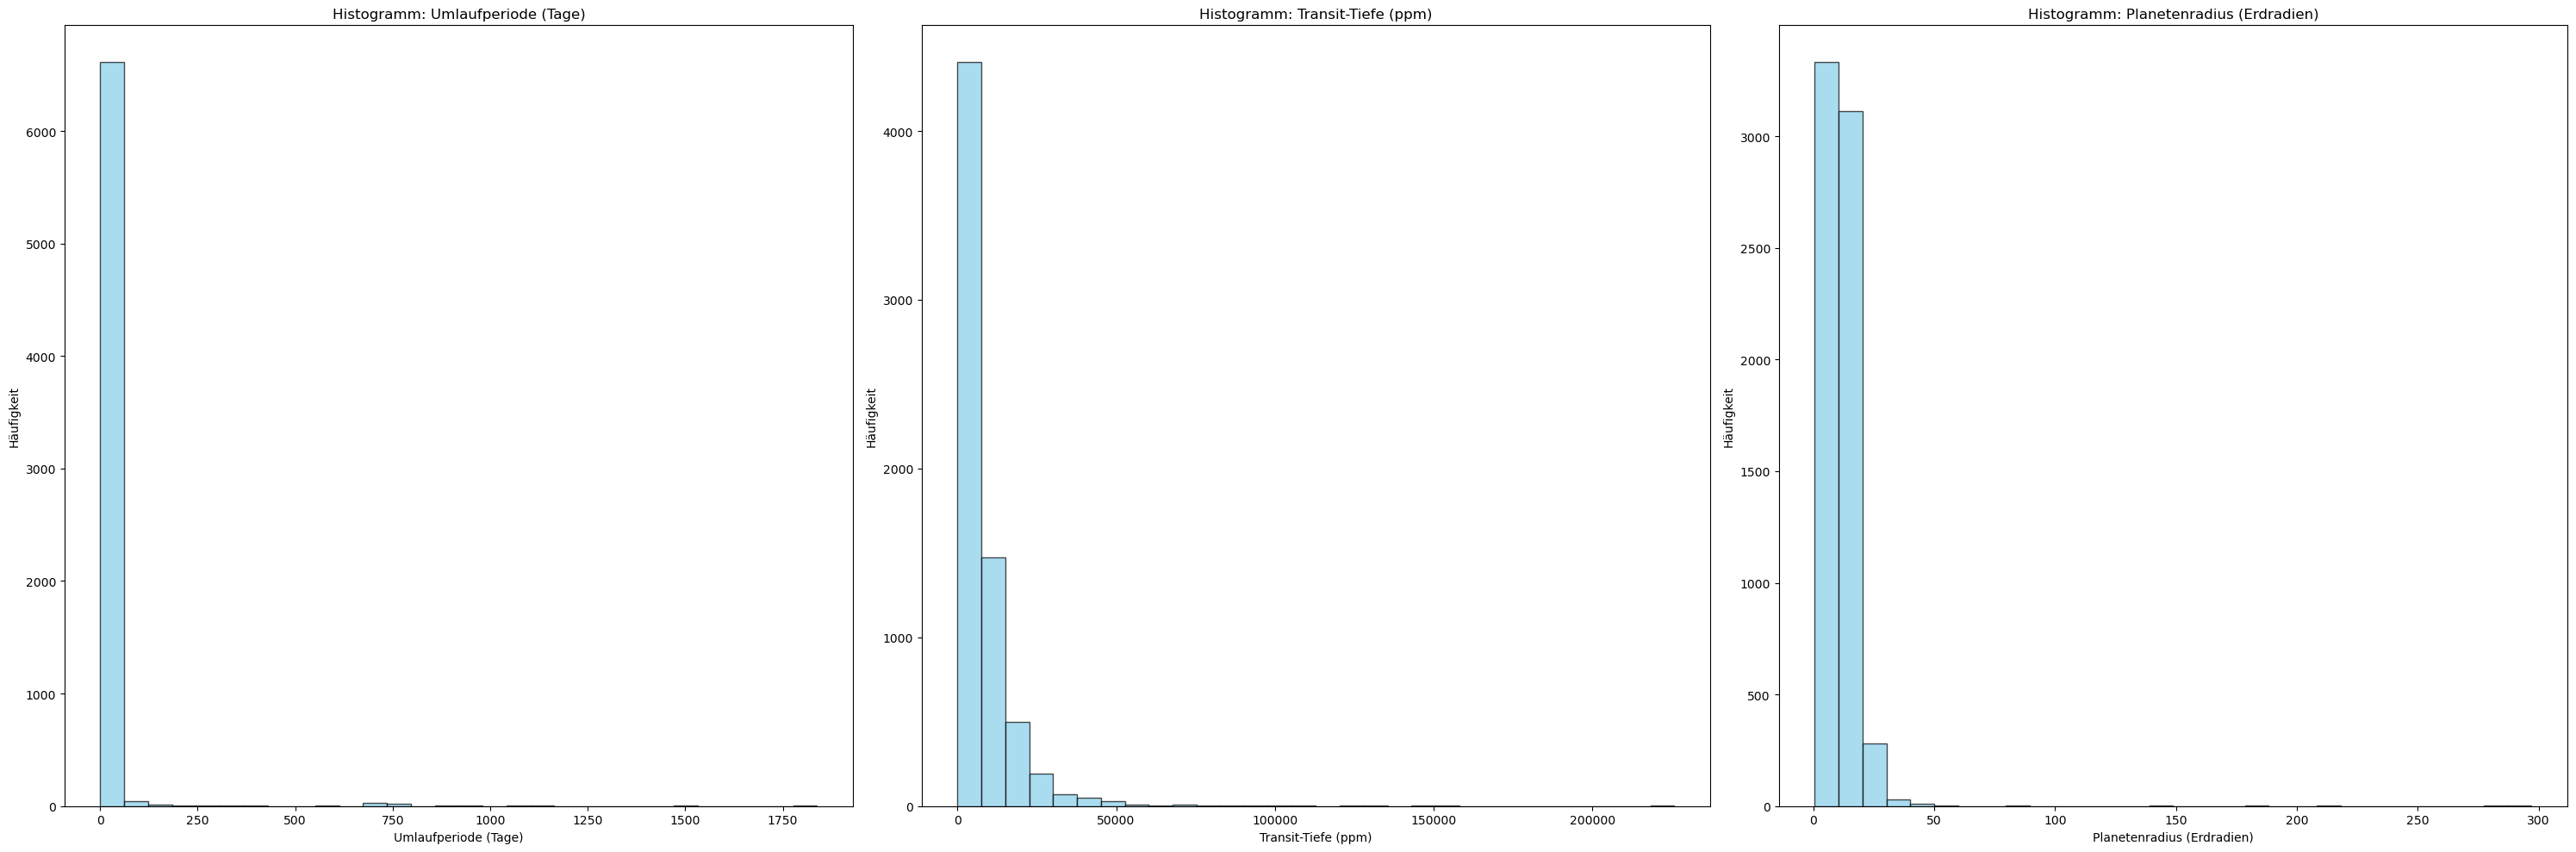

In [10]:
# Variablen für die Analyse
variables = ['pl_orbper', 'pl_trandep', 'pl_rade']
titles = ['Umlaufperiode (Tage)', 'Transit-Tiefe (ppm)', 'Planetenradius (Erdradien)']

# Erstellen von Histogrammen
plt.figure(figsize=(30, 10))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_cleaned[var], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogramm: {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

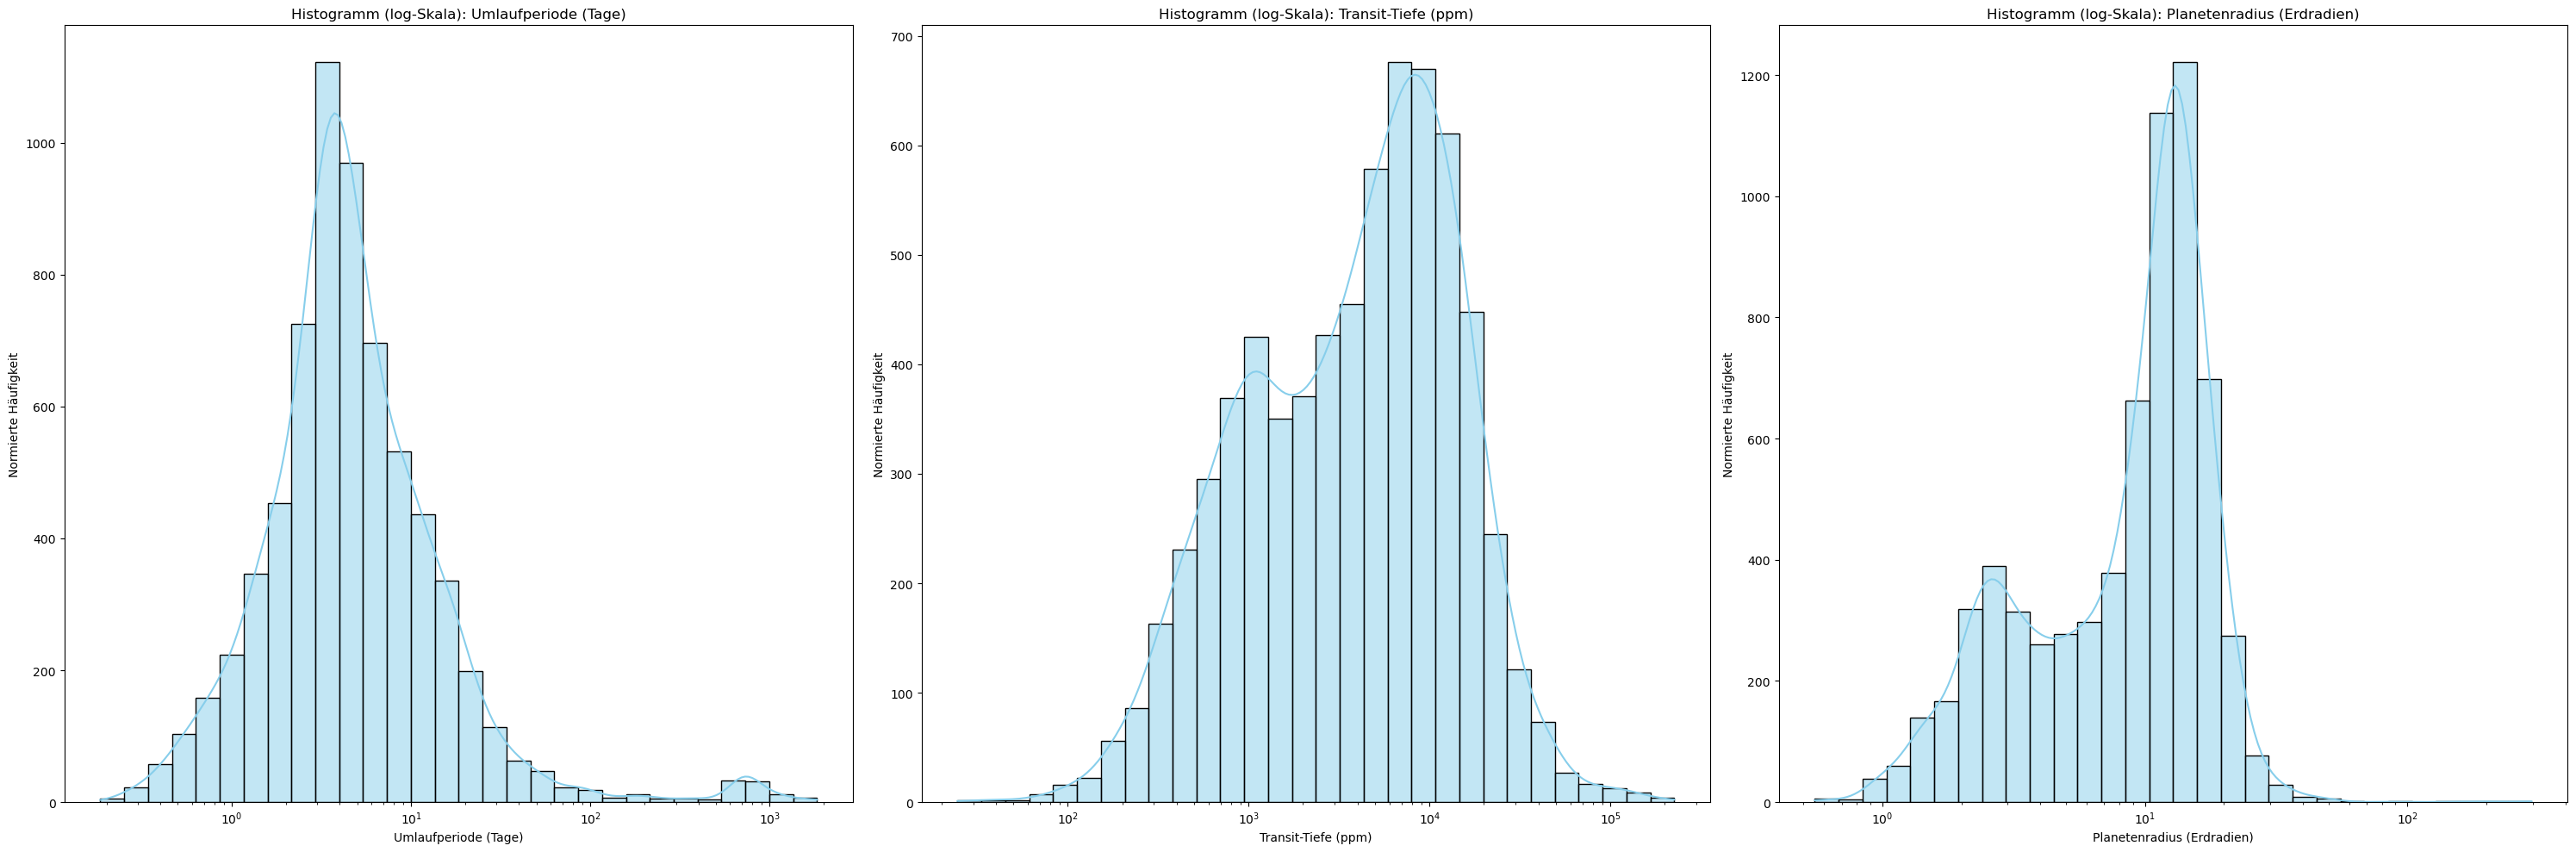

In [11]:
plt.figure(figsize=(30, 10))

# Erstellen von logarithmischen Histogrammen
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_cleaned[var], bins=30, kde=True, color='skyblue', log_scale=(True, False))
    plt.title(f'Histogramm (log-Skala): {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Normierte Häufigkeit')

plt.tight_layout()
plt.show()


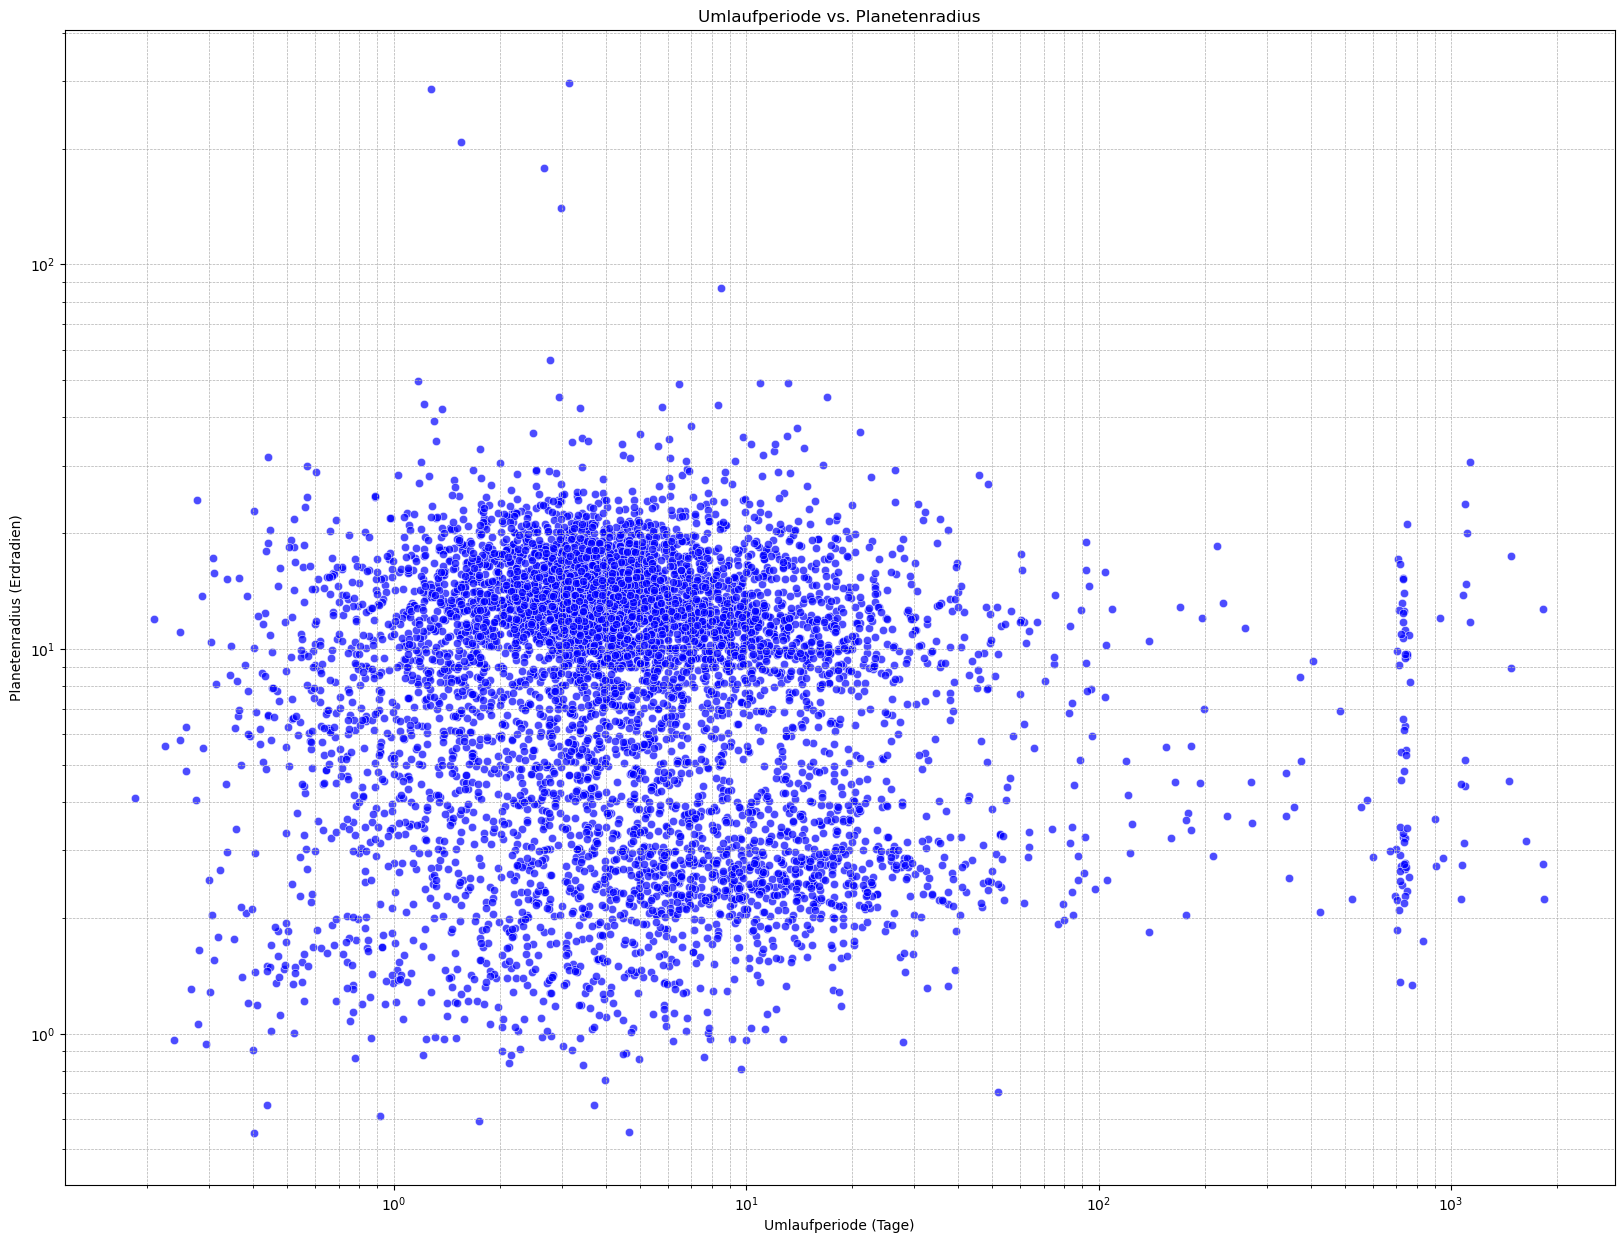

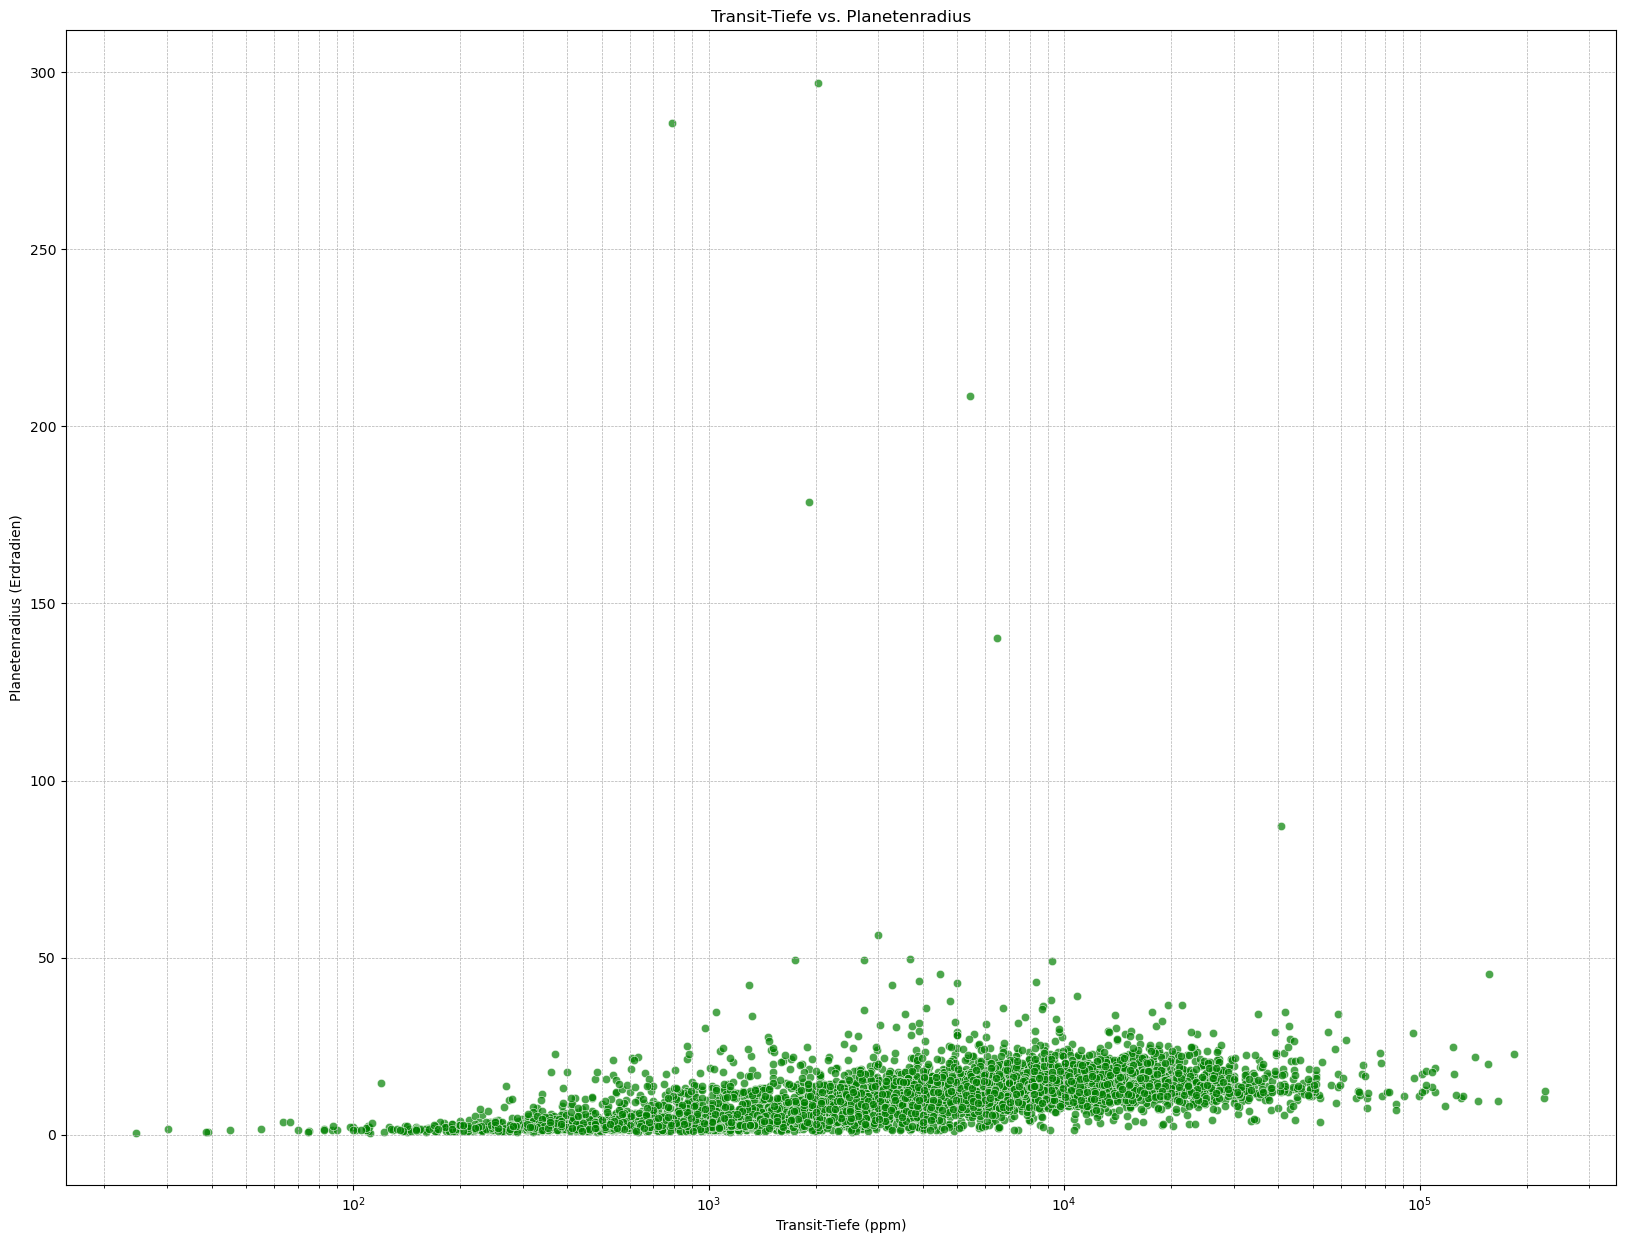

In [12]:
# Streudiagramm: Umlaufperiode vs. Planetenradius
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_cleaned, x='pl_orbper', y='pl_rade', alpha=0.7, color='blue')
plt.title('Umlaufperiode vs. Planetenradius')
plt.xlabel('Umlaufperiode (Tage)')
plt.ylabel('Planetenradius (Erdradien)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Streudiagramm: Transit-Tiefe vs. Planetenradius
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_cleaned, x='pl_trandep', y='pl_rade', alpha=0.7, color='green')
plt.title('Transit-Tiefe vs. Planetenradius')
plt.xlabel('Transit-Tiefe (ppm)')
plt.ylabel('Planetenradius (Erdradien)')
plt.xscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


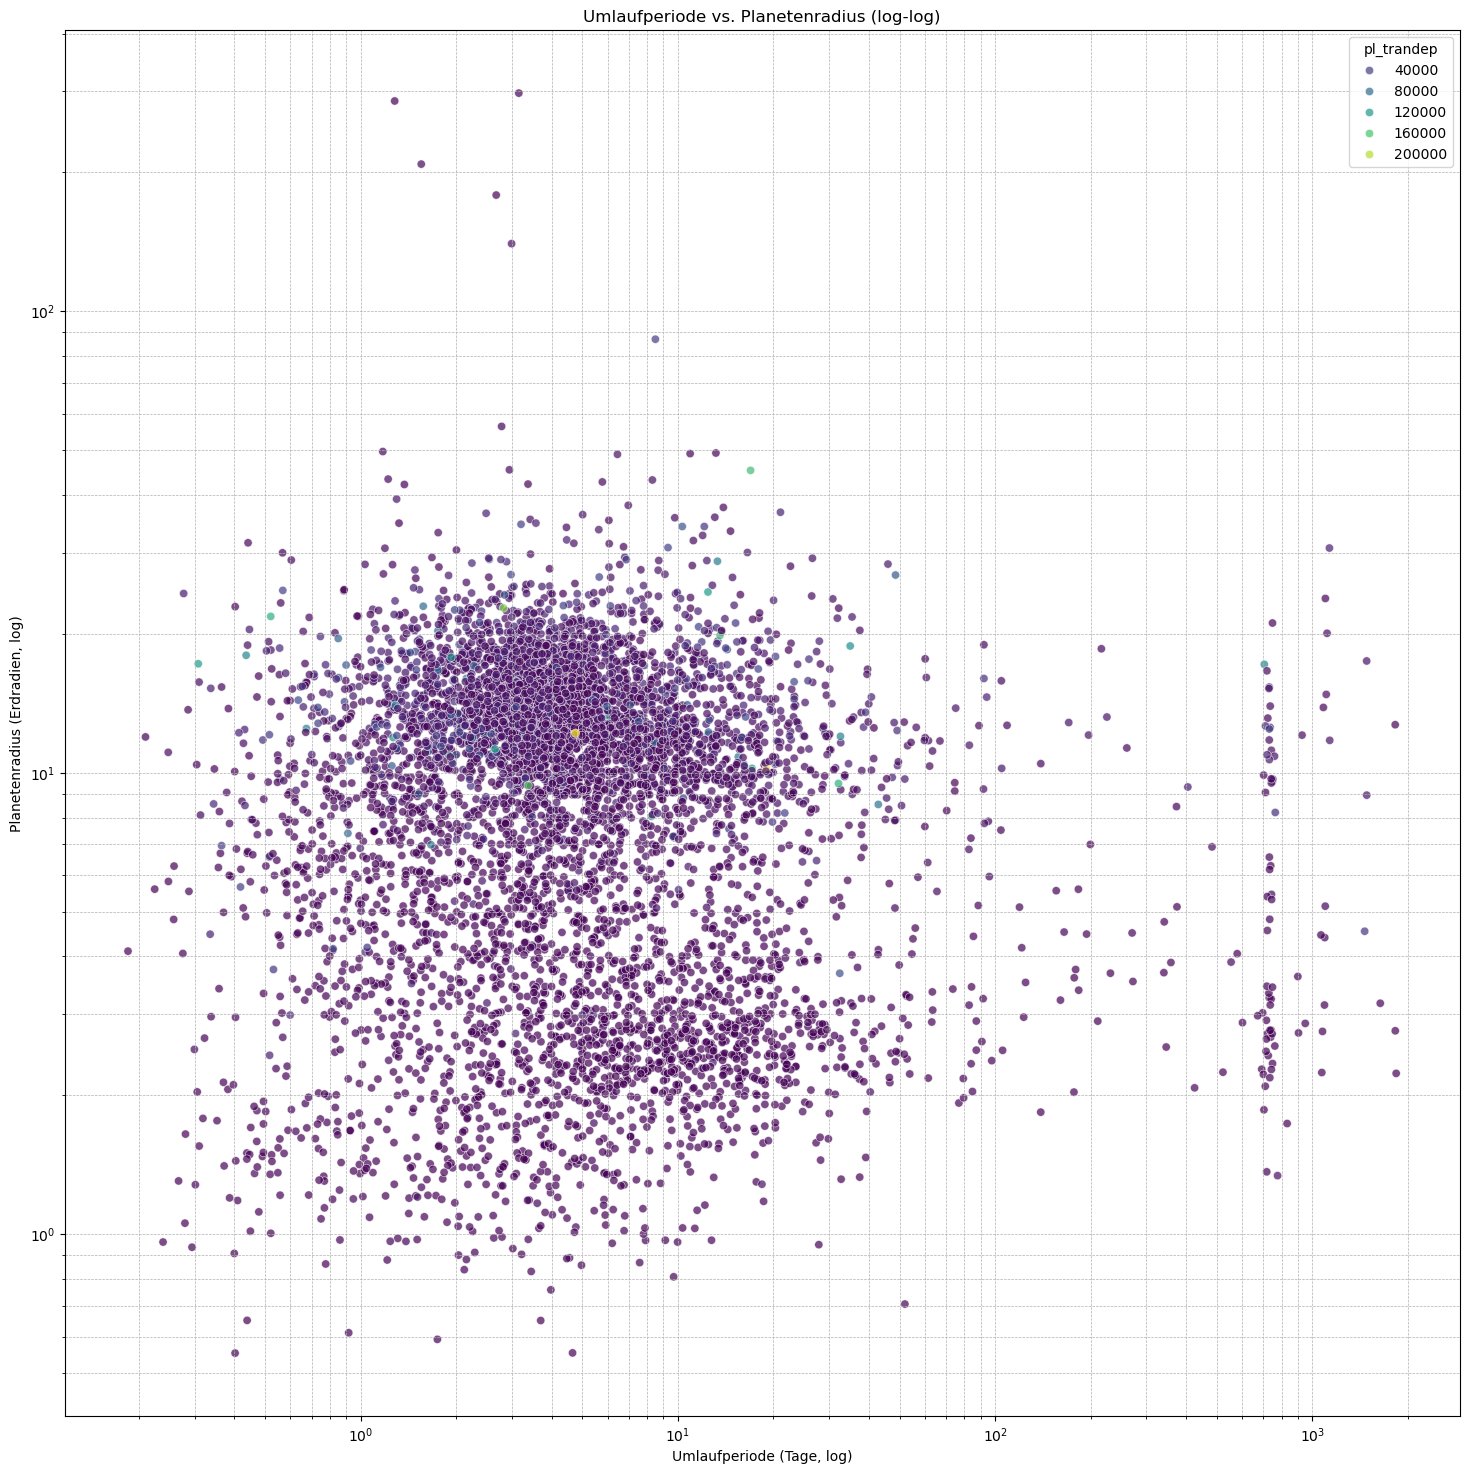

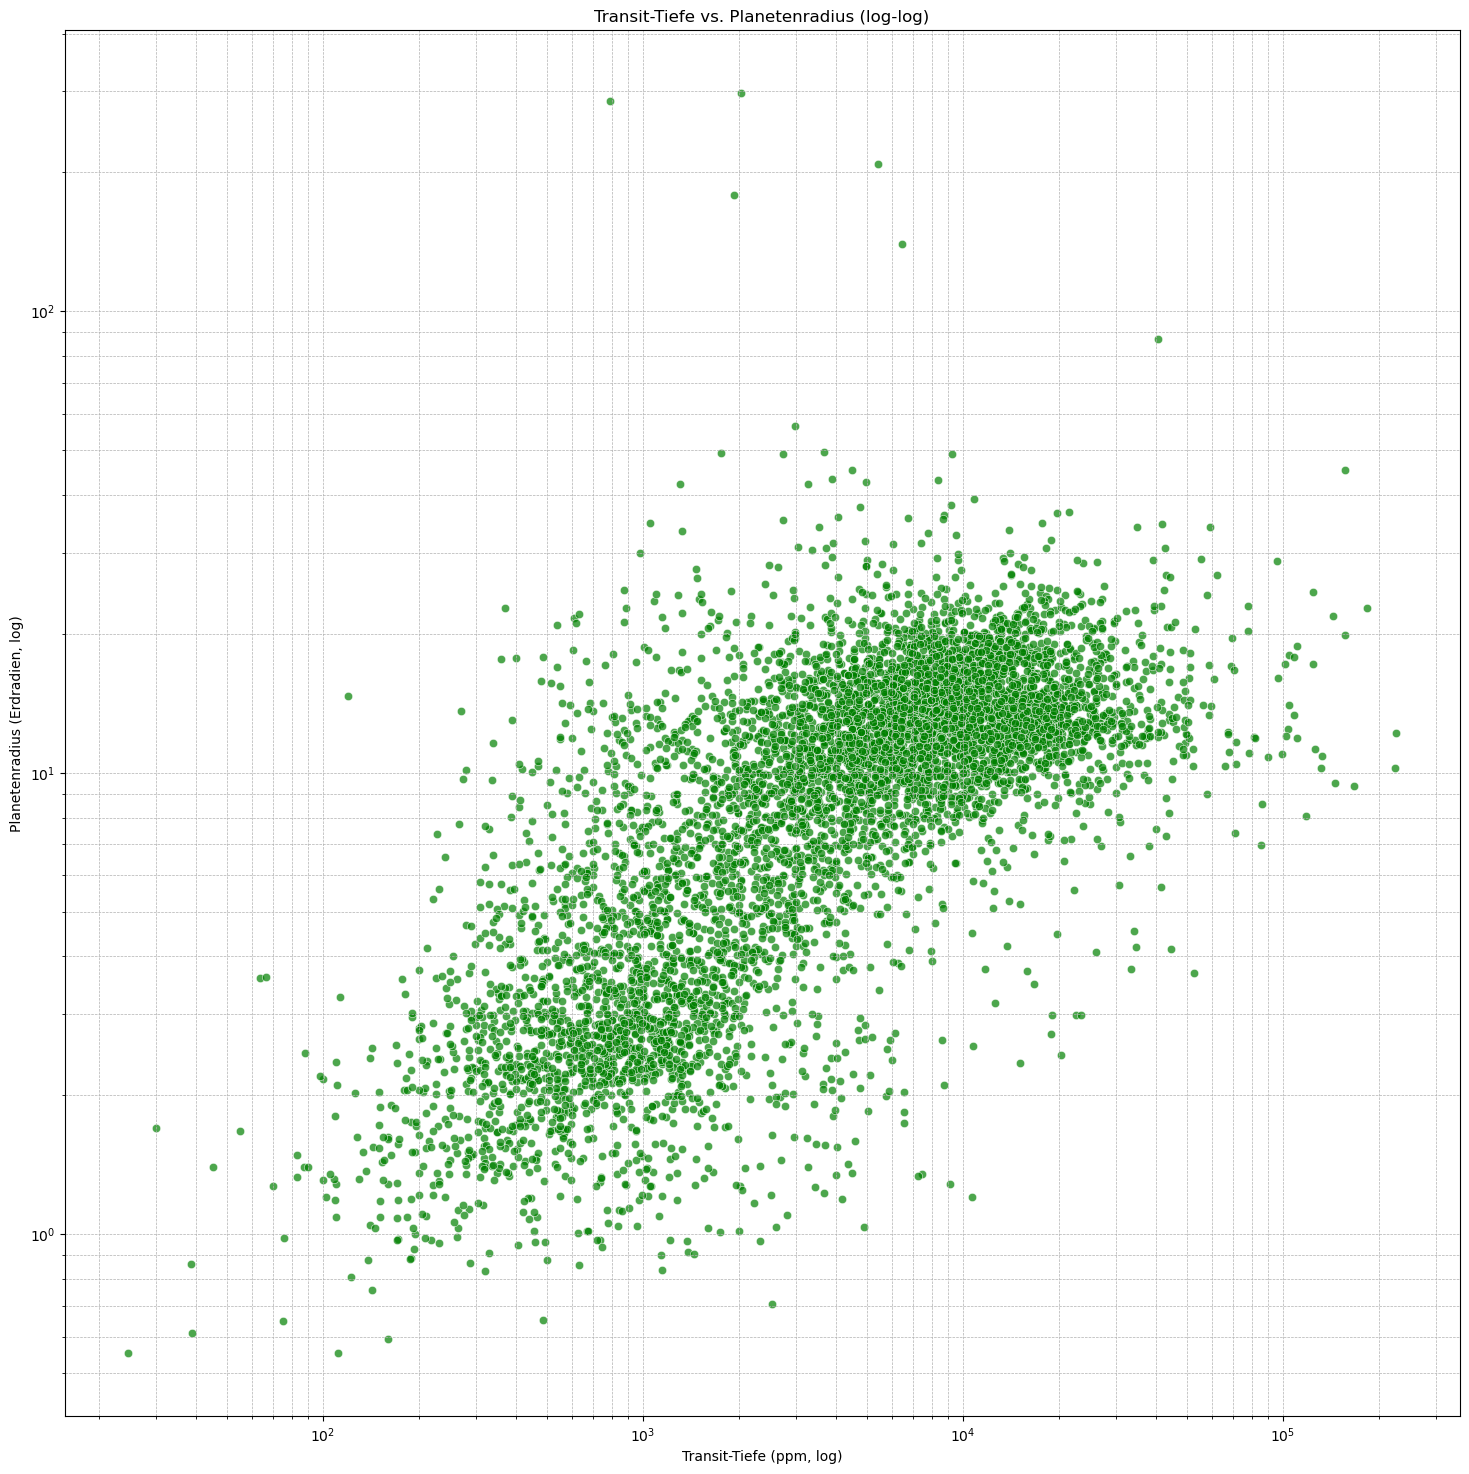

In [13]:
# Scatterplot: Umlaufperiode vs. Planetenradius (log-log)
plt.figure(figsize=(18, 18))
sns.scatterplot(data=df, x='pl_orbper', y='pl_rade', alpha=0.7, hue='pl_trandep', palette='viridis')
plt.title('Umlaufperiode vs. Planetenradius (log-log)')
plt.xlabel('Umlaufperiode (Tage, log)')
plt.ylabel('Planetenradius (Erdradien, log)')
plt.xscale('log')
plt.yscale('log')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Scatterplot: Transit-Tiefe vs. Planetenradius
plt.figure(figsize=(18,18))
sns.scatterplot(data=df, x='pl_trandep', y='pl_rade', alpha=0.7, color='green')
plt.title('Transit-Tiefe vs. Planetenradius (log-log)')
plt.xlabel('Transit-Tiefe (ppm, log)')
plt.ylabel('Planetenradius (Erdradien, log)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


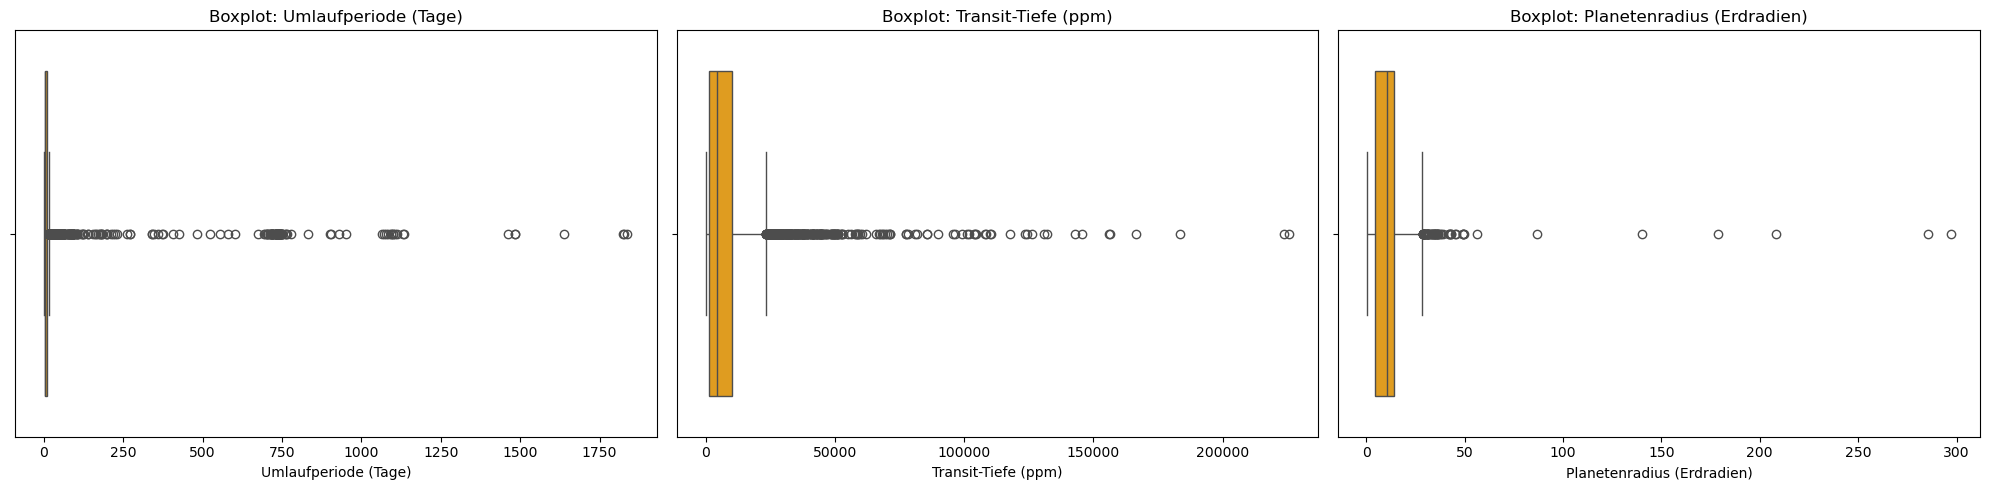

In [14]:
# Boxplots der zentralen Variablen
plt.figure(figsize=(20, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_cleaned, x=var, color='orange')
    plt.title(f'Boxplot: {titles[i]}')
    plt.xlabel(titles[i])

plt.tight_layout()
plt.show()

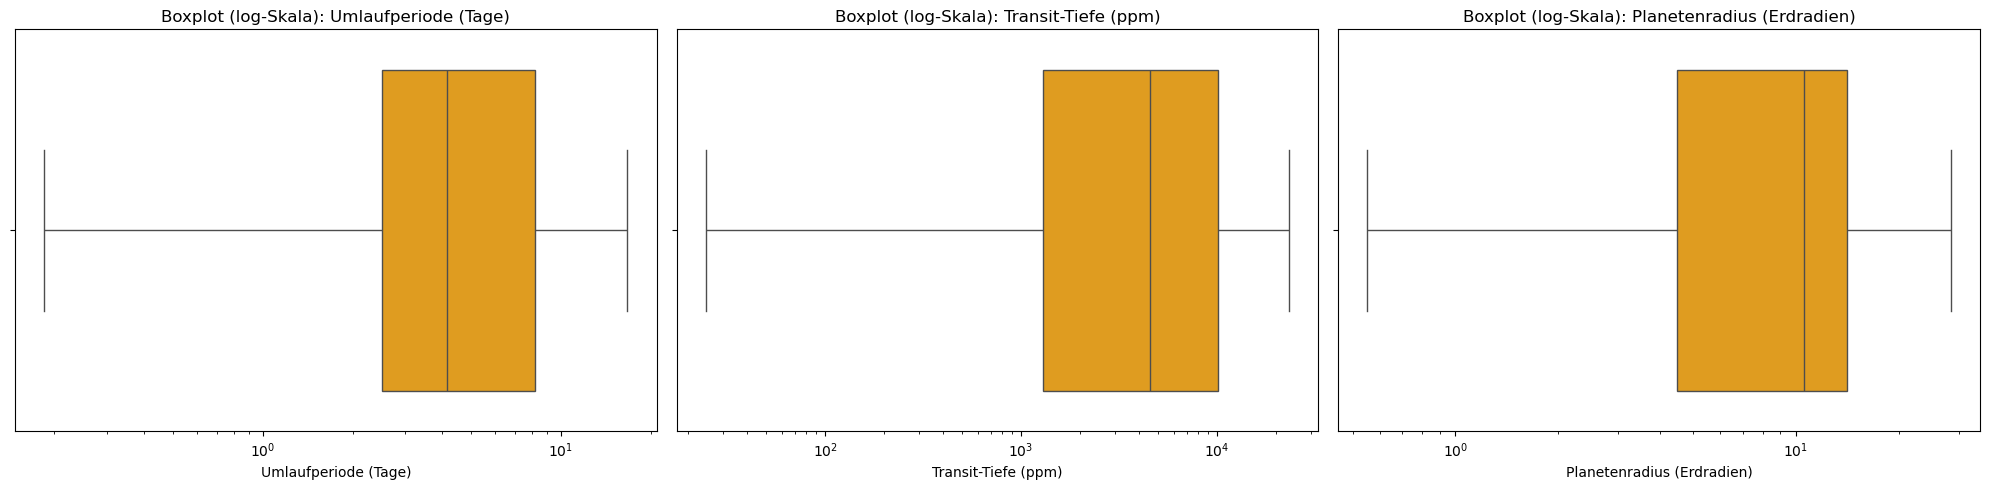

In [15]:
plt.figure(figsize=(20, 5))

# Logarithmische Skalierung und entfernte Ausreißer
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_cleaned, x=var, color='orange', showfliers=False)
    plt.title(f'Boxplot (log-Skala): {titles[i]}')
    plt.xlabel(titles[i])
    plt.xscale('log')  # Log-Skalierung der Achse

plt.tight_layout()
plt.show()

In [16]:
# Logarithmische Transformation zur Reduktion von Ausreißern
df_cleaned['pl_trandep_log'] = np.log1p(df_cleaned['pl_trandep'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[['pl_orbper', 'pl_trandep', 'pl_rade']])

In [18]:
# Entfernen der Kategorien 'PC' und 'APC'
df_cleaned = df_cleaned[~df_cleaned['tfopwg_disp'].isin(['PC', 'APC'])]

In [19]:
def classify_planets(row):
    """
    Funktion zur Klassifikation von Planeten:
    - 1 für echte Planeten
    - 0 für falsch-positive Signale
    """
    if row in ['CP', 'KP']:  # Kategorien für echte Planeten
        return 1
    elif row in ['FA', 'FP']:  # Kategorien für falsch-positive Signale
        return 0
    else:
        return None

In [20]:
# Anwendung der Klassifikationsfunktion
df_cleaned['tfopwg_disp'] = df_cleaned['tfopwg_disp'].apply(classify_planets)

/tmp/ipykernel_4233/1262500063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tfopwg_disp'] = df_cleaned['tfopwg_disp'].apply(classify_planets)


In [21]:
# Überprüfung der neuen Zielvariable
print("Verteilung der Zielvariable nach Bereinigung:")
print(df_cleaned['tfopwg_disp'].value_counts())

Verteilung der Zielvariable nach Bereinigung:
tfopwg_disp
0.0    1063
1.0     999
Name: count, dtype: int64


In [22]:
# Überprüfung der Anzahl der verbleibenden Datensätze
print(f"Anzahl verbleibender Datensätze: {len(df_cleaned)}")

Anzahl verbleibender Datensätze: 2064


In [23]:
df_cleaned['tfopwg_disp'] = pd.to_numeric(df_cleaned['tfopwg_disp'])

/tmp/ipykernel_4233/1502375228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tfopwg_disp'] = pd.to_numeric(df_cleaned['tfopwg_disp'])


In [24]:
df_cleaned['tfopwg_disp'].isna().sum()

2

In [25]:
df_cleaned = df_cleaned.dropna(subset=['tfopwg_disp'])

In [26]:
from sklearn.model_selection import train_test_split
X = df_cleaned[['pl_orbper', 'pl_trandep', 'pl_rade']] 
y = df_cleaned['tfopwg_disp']

In [27]:
# Splitten der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from collections import Counter
# Überprüfung der Klassenverteilung vor dem Oversampling
print("Verteilung der Klassen vor dem Oversampling:", Counter(y_train))

Verteilung der Klassen vor dem Oversampling: Counter({0.0: 850, 1.0: 799})


In [29]:
from imblearn.over_sampling import RandomOverSampler
# Anwendung des RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [30]:
# Überprüfung der Klassenverteilung nach dem Oversampling
print("Verteilung der Klassen nach dem Oversampling:", Counter(y_resampled))

Verteilung der Klassen nach dem Oversampling: Counter({0.0: 850, 1.0: 850})
